# MNIST Digits subset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_results
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import trimap

cols = cm.tab10(np.linspace(0, 1, 10))

Load MNIST digits subset (10,000 points, 784 dimensions)

In [2]:
X = np.load('./data/mnist_X.npy')
L = np.load('./data/mnist_L.npy').flatten()
print("Dataset size = ({},{})".format(X.shape[0],X.shape[1]))

Dataset size = (10000,784)


Calculate the embeddings

In [3]:
y_pca = PCA(n_components = 2).fit_transform(X)
y_tsne = TSNE().fit_transform(X)
y_umap = umap.UMAP().fit_transform(X)
y_trimap = trimap.TRIMAP(verbose=False).fit_transform(X)

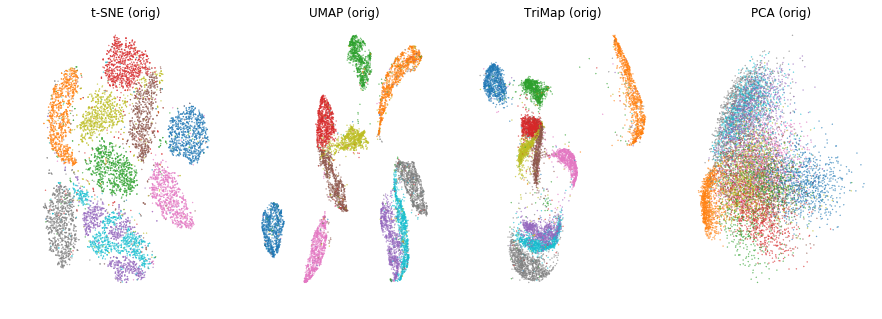

In [4]:
plot_results([y_tsne,y_umap,y_trimap,y_pca], cols[L,:], extension='(orig)')

# Two shifted copies

Create a copy and shift in a random direction

In [5]:
c = np.random.normal(size=X.shape[1]) # create a random direction
c /= np.sqrt(np.sum(c ** 2))
Xc = np.vstack((X, X + 10.0 * c)) # 2 copies of the dataset
Lc = np.hstack((L, L))

In [6]:
yc_pca = PCA(n_components = 2).fit_transform(Xc)
yc_tsne = TSNE().fit_transform(Xc)
yc_umap = umap.UMAP().fit_transform(Xc)
yc_trimap = trimap.TRIMAP(verbose=False).fit_transform(Xc)

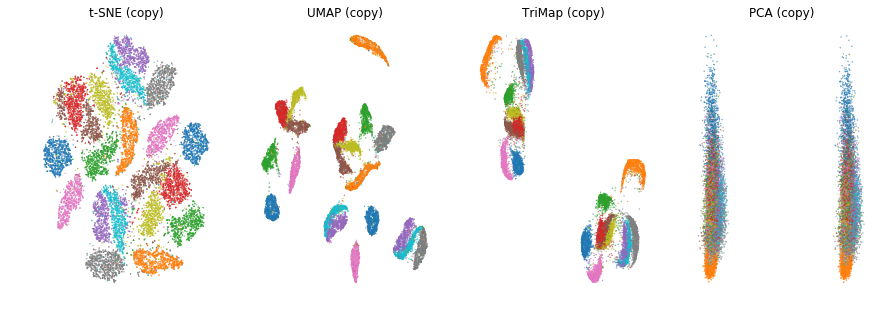

In [7]:
plot_results([yc_tsne,yc_umap,yc_trimap,yc_pca], cols[Lc,:], extension='(copy)')

# Visualizing even digits only

In [8]:
Xe = X[L%2==0,:]
Le = L[L%2==0]

ye_pca = PCA(n_components = 2).fit_transform(Xe)
ye_tsne = TSNE().fit_transform(Xe)
ye_umap = umap.UMAP().fit_transform(Xe)
ye_trimap = trimap.TRIMAP(verbose=False).fit_transform(Xe)

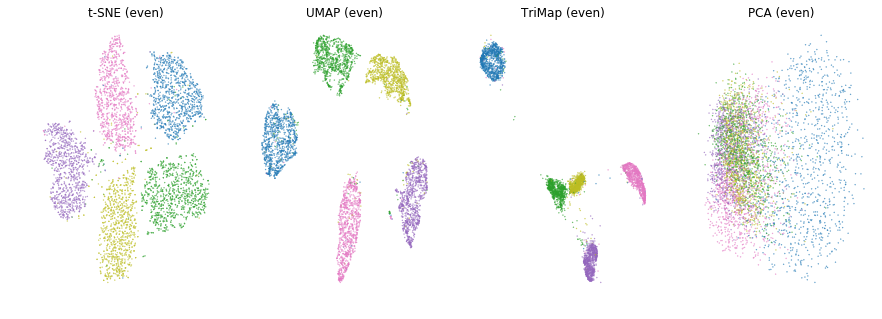

In [9]:
plot_results([ye_tsne,ye_umap,ye_trimap,ye_pca], cols[Le,:], extension='(even)')

# Adding an outlier

In [10]:
c = np.random.random(size=X.shape[1]) # create a random direction
outlier_index = np.random.randint(10000)
Xo = X.copy()
Xo[outlier_index,:] += 5.0 * c

In [11]:
yo_pca = PCA(n_components = 2).fit_transform(Xo)
yo_tsne = TSNE().fit_transform(Xo)
yo_umap = umap.UMAP().fit_transform(Xo)
yo_trimap = trimap.TRIMAP(verbose=False).fit_transform(Xo)

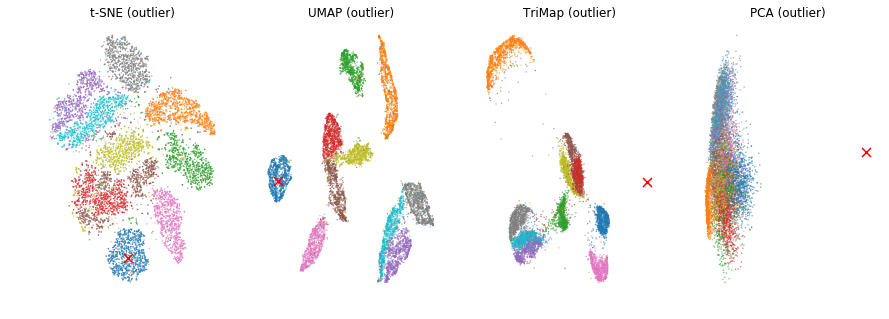

In [12]:
plot_results([yo_tsne,yo_umap,yo_trimap,yo_pca], cols[L,:], index=outlier_index, extension='(outlier)')